# Pondering the Problem of Fitting a Model

## » Understanding bias and variance

## » Defining a strategy for picking models

## » Dividing between training and test sets

### • loading the Boston dataset 

In [1]:
import pandas as pd
from sklearn.datasets import load_boston
boston = load_boston()
x, y = boston.data, boston.target
# showing the information of the data
pd.DataFrame(x, columns=boston.feature_names).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


### • using linear regression (algorithm) and mean squared error (optimizer)

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
regression = LinearRegression()
regression.fit(x, y)
# calculates the error using mean squared error
optimizer = mean_squared_error(y_true=y, y_pred=regression.predict(x))
print(f'Mean squared error: {optimizer:0.2f}')

Mean squared error: 21.89


### • seperating data train and data test

In [3]:
from sklearn.model_selection import train_test_split
# assigns the data train and test to the respective variables
# test_size determines the size of the data test from the original data
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.3, random_state=5)

print(x_train.shape, x_test.shape)

(354, 13) (152, 13)


### • training the regression model with data train

In [4]:
regression.fit(x_train, y_train)
print(f'''Train mean squared error: {mean_squared_error(
      y_true=y_train, y_pred=regression.predict(x_train))}''')

Train mean squared error: 19.068341850927226


### • testing the model with the data test

In [5]:
print(f'''Test mean squared error: {mean_squared_error(
     y_true=y_test, y_pred=regression.predict(x_test))}''')

Test mean squared error: 30.69703770408852


### • changing some parameter to change the test result

In [6]:
# changes the test_size into 25 and random_state into 6
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.25, random_state=6)

regression.fit(x_train, y_train)

print(f'''Train mean squared error: {mean_squared_error(
      y_true=y_train, y_pred=regression.predict(x_train))}''')
print(f'''Test mean squared error: {mean_squared_error(
     y_true=y_test, y_pred=regression.predict(x_test))}''')

Train mean squared error: 20.990631675966558
Test mean squared error: 25.65683332692814


# Cross-Validating

## » Using cross-validation on k folds

### • Executing cross-validation technique

In [7]:
from sklearn.model_selection import cross_val_score, KFold
import numpy as np
# initializes an iterator with KFold
# n_splits determines the number of folds
# shuffle determine whether you want to shuffle the data
iterator = KFold(n_splits=10, shuffle=True, random_state=3)
# assigns the score of each folds from cross-validation
# 1st para. determines the algorithm used
# 2nd para. is the data used to train
# 3rd para. is the target used to train
# scoring determines which type of scoring to be used
# cv determines the iterator used
# n_jobs determines how many cores used in the process
scores = cross_val_score(regression, x, y, 
                         scoring='neg_mean_squared_error',
                         cv=iterator, n_jobs=1)

# prints the mean and std of the scores from the cross-validation
# procedures
print(f'''Folds:{len(scores)}
Mean squared error: {np.mean(np.abs(scores)):.2f}
std: {np.std(scores):.2f}''')

Folds:10
Mean squared error: 23.87
std: 8.06


## » Sampling stratifications by complex data

### • illustrates the effect of a certain characteristic in complex data in respect with random sampling

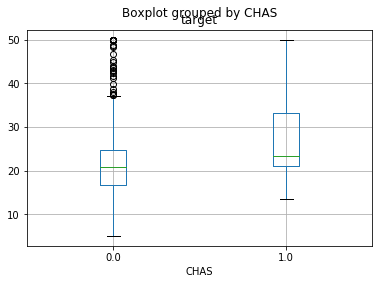

In [8]:
%matplotlib inline
import pandas as pd
df = pd.DataFrame(x, columns=boston.feature_names)
# assigns values in feature target to y
df['target'] = y
# plots a boxplots to shows the difference between a binary value
# in feature CHAS in respect to the target
df.boxplot('target', by='CHAS', return_type='axes');

## • using StratifiedKFold to control the random sampling used by KFold to build the folds

In [9]:
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import mean_squared_error
# initializes an iterator with StratifiedKFold
# using 3 folds with the size of 35% of the original dataset
strata = StratifiedShuffleSplit(n_splits=3, test_size=.35, 
                                random_state=0)
scores = list()
# uses for loop to assign the return of the iterator
# the parameters used in the iterator strata is 
# 1st : the data used
# 2nd (x[:,3]) : the variable you want to control, in this case
# all of the obsevations in "CHAS" feature
for train_index, test_index in strata.split(x, x[:,3]):
    # assign all of the index to its respective data
    x_train, x_test = x[train_index], x[test_index]
    y_train, y_test = y[train_index], y[test_index]
    regression.fit(x_train, y_train)
    errors = mean_squared_error(y_true=y_test, 
                                y_pred=regression.predict(x_test))
    scores.append(errors)
    
print(f'''Folds: {len(scores)}
Mean squared error: {np.mean(np.abs(scores)):.2f}
std: {np.std(scores):.2f}''')

Folds: 3
Mean squared error: 24.29
std: 3.99


# Selecting Variables Like a Pro

## » Selecting by univariate measures

### • trying SelectPercentile with f_regression as its metric

In [10]:
len(boston.feature_names)

13

In [11]:
from sklearn.feature_selection import SelectPercentile
from sklearn.feature_selection import f_regression
# using SelectPercentile as the variables selector
# 1st para. is the metrics for association used
# 2nd para. is percent of features to keep as a sample
selector_f = SelectPercentile(f_regression, percentile=25)
selector_f.fit(x, y)
for n, s in zip(boston.feature_names, selector_f.scores_):
    print(f'F-score: {s:.2f} for feature {n}')

F-score: 89.49 for feature CRIM
F-score: 75.26 for feature ZN
F-score: 153.95 for feature INDUS
F-score: 15.97 for feature CHAS
F-score: 112.59 for feature NOX
F-score: 471.85 for feature RM
F-score: 83.48 for feature AGE
F-score: 33.58 for feature DIS
F-score: 85.91 for feature RAD
F-score: 141.76 for feature TAX
F-score: 175.11 for feature PTRATIO
F-score: 63.05 for feature B
F-score: 601.62 for feature LSTAT


## » Using a greedy search

### • trying greedy search method using RFECV class 

In [12]:
from sklearn.feature_selection import RFECV
# estimator para. determines the method of fitting
# cv para. determines kind of cross validating used,
# but in this care, the uses of integer mean how many the folds used
# scoring para. determines the scoring method to calculate the error
selector = RFECV(estimator=regression,
                 cv=10,
                 scoring='neg_mean_squared_error')
selector.fit(x, y)
print(f'Optimal number of features: {selector.n_features_}')

Optimal number of features: 6


### • obtaining the index of variables from the reduced set and showing it

In [13]:
# selector.support_ will return the index of the variables
print(boston.feature_names[selector.support_])

['CHAS' 'NOX' 'RM' 'DIS' 'PTRATIO' 'LSTAT']


# Pumping Up Your Hyperparameters 

### • loading iris dataset

In [14]:
import numpy as np
from sklearn.datasets import load_iris
iris = load_iris()
x_iris, y_iris = iris.data, iris.target

## » Implementing a grid search

### • using KNN classifier as an example

In [15]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5, weights='uniform',
                                  metric='minkowski', p=2)

### • prepating to implement a grid search

In [16]:
# makes a dict. of every paramater possible arguments
# the keys are the names of the parameter
# and the dict.'s values are the list you want to test
grid = {'n_neighbors': range(1,11), 'weights': ['uniform', 'distance'],
        'p': [1, 2]}

# shows the number of models with all possible combination of parameters
print(f'Number of tested models: {np.prod([len(grid[element]) for element in grid])}')
# using accuracy score as the evaluation measure
score_metric = 'accuracy'

Number of tested models: 40


### • creating a model with default paramaters

In [59]:
from sklearn.model_selection import cross_val_score
# calculates the cross validation score with 'default' configuration
score_default = np.mean(cross_val_score(classifier, x_iris, y_iris, cv=10,
                                        scoring=score_metric, n_jobs=1))

print(f'Baseline with default parameters {score_default:.3f}')

Baseline with default parameters 0.967


### • implementing grid search

In [25]:
from sklearn.model_selection import GridSearchCV
# estimator para. determines which algorithm used
# param_grid para, is the dict you create before
# scoring para. is the scoring method used
# n_jobs para. is the core used in the process
# refit para. will refit model with the best found parameter
# return_train_score para. is self explainatory
# cv para. determines the number of your cross validation folds
search = GridSearchCV(estimator=classifier, param_grid=grid,
                      scoring=score_metric, n_jobs=1,
                      refit=True, return_train_score=True,
                      cv=10)

search.fit(x_iris, y_iris);

### • printing the resulting best parameters and the score of the best combination

In [28]:
# inspects the the results using best_params_ and best_score_
print(f'Best parameters: {search.best_params_}')
print(f'CV accuracy of best parameters: {search.best_score_:.3f}')

Best parameters: {'n_neighbors': 9, 'p': 1, 'weights': 'uniform'}
CV accuracy of best parameters: 0.973


### • inspecting the entire cross validation score and its standard deviation

In [32]:
# print(search.cv_results_)

### • visualizing how train and validation behave when using different n_neighbors

In [55]:
from sklearn.model_selection import validation_curve
# uses manhattan distance
model = KNeighborsClassifier(weights='uniform', metric='minkowski',
                             p=1)
# param_names is the paramaters you want to compare
# param_range is the list of the values for the paramaters you want to compare
# there are 2 returns from the validation_curve
train, test = validation_curve(model, x_iris, y_iris,
                               param_name='n_neighbors',
                               param_range=range(9, 21), 
                               cv=10, scoring='accuracy',
                               n_jobs=1)

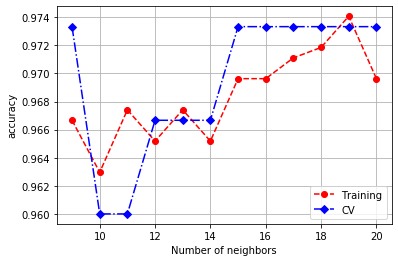

In [57]:
import matplotlib.pyplot as plt
mean_train = np.mean(train, axis=1)
mean_test = np.mean(test, axis=1)
plt.plot(range(9,21), mean_train, 'ro--', label='Training')
plt.plot(range(9,21), mean_test, 'bD-.', label='CV')
plt.grid()
plt.xlabel('Number of neighbors')
plt.ylabel('accuracy')
plt.legend(loc='lower right', numpoints=1)
plt.show()


## » Trying a randomized search

### • performing randomized search

In [145]:
from sklearn.model_selection import RandomizedSearchCV
# param_distributions para. is the dict. you create earlier
random_search = RandomizedSearchCV(estimator=classifier,
                                 param_distributions=grid, 
                                 n_iter=10, scoring=score_metric,
                                 n_jobs=1, refit=True, cv=10)


random_search.fit(x_iris, y_iris);

### • exploring the result

In [146]:
print(f'Best parameters: {random_search.best_params_}')
print(f'CV accuracy of best parameters: {random_search.best_score_:.3f}')

Best parameters: {'weights': 'distance', 'p': 2, 'n_neighbors': 10}
CV accuracy of best parameters: 0.973
